In [1]:
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
draftdata=nfl.import_draft_picks()
draftdata

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
0,1980,1,1,DET,None,SimsBi00,billy-sims-1,Billy Sims,False,RB,...,0.0,1131.0,5106.0,42.0,186.0,2072.0,5.0,NaN,NaN,NaN
1,1980,1,2,NYJ,None,JoneLa00,lam-jones-1,Lam Jones,False,WR,...,0.0,9.0,17.0,0.0,138.0,2322.0,13.0,NaN,NaN,NaN
2,1980,1,3,CIN,None,MunoAn00,None,Anthony Munoz,True,T,...,0.0,0.0,0.0,0.0,7.0,18.0,4.0,NaN,NaN,NaN
3,1980,1,4,GNB,None,ClarBr23,bruce-clark-1,Bruce Clark,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,39.5
4,1980,1,5,BAL,None,DickCu00,curtis-dickey-1,Curtis Dickey,False,RB,...,0.0,937.0,4019.0,32.0,134.0,1577.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11892,2017,7,249,SEA,00-0033594,CarsCh00,chris-carson-1,Chris Carson,False,RB,...,0.0,769.0,3502.0,24.0,107.0,804.0,7.0,NaN,NaN,NaN
11893,2017,7,250,DET,00-0033595,OConPa00,pat-oconnor-1,Pat O'Connor,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,1.5
11894,2017,7,251,CIN,00-0033798,SchrMa00,mason-schreck-1,Mason Schreck,False,TE,...,0.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,NaN,NaN
11895,2017,7,252,CLE,00-0033596,DayeMa00,matt-dayes-1,Matthew Dayes,False,RB,...,0.0,5.0,13.0,0.0,4.0,29.0,0.0,9.0,NaN,NaN


In [21]:
draftdata=draftdata[["season","pick","team"]]
draftdata1=draftdata[draftdata["season"]>=2000]
draftdata1

,season,pick,team
6026,2000,1,Cleveland Browns
6027,2000,2,Washington Commanders
6028,2000,3,Washington Commanders
6029,2000,4,Cincinnati Bengals
6030,2000,5,Baltimore Ravens
...,...,...,...
11892,2017,249,Seattle Seahawks
11893,2017,250,Detroit Lions
11894,2017,251,Cincinnati Bengals
11895,2017,252,Cleveland Browns


In [22]:
draftdata1.team.unique()

array(['Cleveland Browns', 'Washington Commanders', 'Cincinnati Bengals',
       'Baltimore Ravens', 'Philadelphia Eagles', 'Arizona Cardinals',
       'Pittsburgh Steelers', 'Chicago Bears', 'New York Giants',
       'New York Jets', 'Green Bay Packers', 'Denver Broncos',
       'San Francisco 49ers', 'Las Vegas Raiders', 'Seattle Seahawks',
       'Detroit Lions', 'Kansas City Chiefs', 'Carolina Panthers',
       'Minnesota Vikings', 'Buffalo Bills', 'Indianapolis Colts',
       'Jacksonville Jaguars', 'Tennessee Titans', 'Los Angeles Rams',
       'New Orleans Saints', 'Atlanta Falcons', 'Los Angeles Chargers',
       'New England Patriots', 'Dallas Cowboys', 'Tampa Bay Buccaneers',
       'Miami Dolphins', 'Houston Texans'], dtype=object)

In [27]:
draftdata1["team"] = draftdata1["team"].replace(['CLE', 'WAS', 'CIN', 'BAL', 'PHI', 'ARI', 'PIT', 'CHI', 'NYG',
       'NYJ', 'GNB', 'DEN', 'SFO', 'OAK', 'SEA', 'DET', 'KAN', 'CAR',
       'MIN', 'BUF', 'IND', 'JAX', 'TEN', 'STL', 'NOR', 'ATL', 'SDG',
       'NWE', 'DAL', 'TAM', 'MIA', 'HOU', 'LAR', 'LAC', 'LVR'],['Cleveland Browns','Washington Commanders',"Cincinnati Bengals","Baltimore Ravens",
                                                               "Philadelphia Eagles","Arizona Cardinals","Pittsburgh Steelers", "Chicago Bears","New York Giants",
                                                               "New York Jets","Green Bay Packers","Denver Broncos","San Francisco 49ers","Las Vegas Raiders","Seattle Seahawks","Detroit Lions","Kansas City Chiefs",
                                                               "Carolina Panthers","Minnesota Vikings","Buffalo Bills","Indianapolis Colts","Jacksonville Jaguars","Tennessee Titans","Los Angeles Rams","New Orleans Saints",
                                                               "Atlanta Falcons","Los Angeles Chargers","New England Patriots","Dallas Cowboys","Tampa Bay Buccaneers","Miami Dolphins", "Houston Texans",
                                                               "Los Angeles Rams","Los Angeles Chargers","Las Vegas Raiders"])

<ipython-input-27-66fa882b860a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draftdata1["team"] = draftdata1["team"].replace(['CLE', 'WAS', 'CIN', 'BAL', 'PHI', 'ARI', 'PIT', 'CHI', 'NYG',


In [28]:
draftdata1.head()

,season,pick,team
6026,2000,1,Cleveland Browns
6027,2000,2,Washington Commanders
6028,2000,3,Washington Commanders
6029,2000,4,Cincinnati Bengals
6030,2000,5,Baltimore Ravens


In [29]:
draftvalue=pd.read_csv("https://raw.githubusercontent.com/leesharpe/nfldata/master/data/draft_values.csv")
draftvalue.head()

,pick,stuart,johnson,hill,otc,pff
0,1,34.6,3000,1000.00,3000,1.135
1,2,30.2,2600,717.17,2635,1.099
2,3,27.6,2200,514.33,2421,1.063
3,4,25.8,1800,490.52,2270,1.027
4,5,24.3,1700,467.81,2152,0.991


In [30]:
draftvalue=draftvalue[["pick","johnson"]]
datavalue=draftdata1.merge(draftvalue,on="pick",how="left").set_index('season')
datavalue

,pick,team,johnson
season,,,
2000,1,Cleveland Browns,3000
2000,2,Washington Commanders,2600
2000,3,Washington Commanders,2200
2000,4,Cincinnati Bengals,1800
2000,5,Baltimore Ravens,1700
...,...,...,...
2017,249,Seattle Seahawks,0
2017,250,Detroit Lions,0
2017,251,Cincinnati Bengals,0


In [31]:
team_wins= pd.read_csv(r'C:\Users\robertsb\Documents\project\nfl wins by year.csv')
team_wins.head()

,Unnamed: 0,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
0,0,Los Angeles Chargers,1,15,0,0.063,269,440,-171,01/07/2000,0 - 8 - 0,01/07/2000,0.125,01/11/2000,0.083,0 - 4 - 0,4L,01/04/2000,2000
1,1,Arizona Cardinals,3,13,0,0.188,210,443,-233,03/05/2000,0 - 8 - 0,02/06/2000,0.250,02/10/2000,0.167,01/03/2000,7L,0 - 5 - 0,2000
2,2,Cleveland Browns,3,13,0,0.188,161,419,-258,02/06/2000,01/07/2000,02/08/2000,0.200,03/10/2000,0.231,0 - 3 - 0,5L,0 - 5 - 0,2000
3,3,Atlanta Falcons,4,12,0,0.250,252,413,-161,03/05/2000,01/07/2000,03/05/2000,0.375,03/09/2000,0.250,01/03/2000,1W,01/04/2000,2000
4,4,Cincinnati Bengals,4,12,0,0.250,185,359,-174,03/05/2000,01/07/2000,02/08/2000,0.200,03/10/2000,0.231,01/02/2000,1L,02/03/2000,2000


In [32]:
team_wins=team_wins[["NFL Team","Year","W"]]
team_wins = team_wins.sort_values(["NFL Team","Year"], ascending = [True, True])
team_wins.head(30)

,NFL Team,Year,W
1,Arizona Cardinals,2000,3
41,Arizona Cardinals,2001,7
66,Arizona Cardinals,2002,5
94,Arizona Cardinals,2003,4
133,Arizona Cardinals,2004,6
165,Arizona Cardinals,2005,5
194,Arizona Cardinals,2006,5
237,Arizona Cardinals,2007,8
270,Arizona Cardinals,2008,9
308,Arizona Cardinals,2009,10


In [33]:
team_wins["diff"]=team_wins["W"].diff()
team_wins.loc[team_wins["Year"]==2000,'diff']=np.nan
team_wins= team_wins[team_wins.Year < 2018 ]
team_wins.head(30)

,NFL Team,Year,W,diff
1,Arizona Cardinals,2000,3,NaN
41,Arizona Cardinals,2001,7,4.0
66,Arizona Cardinals,2002,5,-2.0
94,Arizona Cardinals,2003,4,-1.0
133,Arizona Cardinals,2004,6,2.0
165,Arizona Cardinals,2005,5,-1.0
194,Arizona Cardinals,2006,5,0.0
237,Arizona Cardinals,2007,8,3.0
270,Arizona Cardinals,2008,9,1.0
308,Arizona Cardinals,2009,10,1.0


In [36]:
team_wins.set_index("NFL Team")

,Year,W,diff
NFL Team,,,
Arizona Cardinals,2000,3,NaN
Arizona Cardinals,2001,7,4.0
Arizona Cardinals,2002,5,-2.0
Arizona Cardinals,2003,4,-1.0
Arizona Cardinals,2004,6,2.0
...,...,...,...
Washington Commanders,2013,3,-7.0
Washington Commanders,2014,4,1.0
Washington Commanders,2015,9,5.0


In [39]:
wins01=team_wins[team_wins["Year"]==2001]
value01=datavalue.loc[2001]
teams01=value01.groupby("team")["johnson"].sum()
merged01=wins01.merge(teams01,how="outer",left_on="NFL Team",right_on="team").set_axis(wins01.index)
merged01

,NFL Team,Year,W,diff,johnson
41,Arizona Cardinals,2001,7,4.0,4023
42,Atlanta Falcons,2001,7,3.0,3818
51,Baltimore Ravens,2001,10,-2.0,1103
33,Buffalo Bills,2001,3,-5.0,2050
31,Carolina Panthers,2001,1,-6.0,2075
59,Chicago Bears,2001,13,8.0,2303
37,Cincinnati Bengals,2001,6,2.0,2773
43,Cleveland Browns,2001,7,4.0,3231
34,Dallas Cowboys,2001,5,0.0,958
47,Denver Broncos,2001,8,-3.0,1422


[Text(0, 0.5, 'Difference in Wins'),
 Text(0.5, 0, 'Draft Value (Johnson Chart)'),
 Text(0.5, 1.0, 'Difference in Wins for NFL Teams from 2000 to 2001 Season given their 2001 Draft Value')]

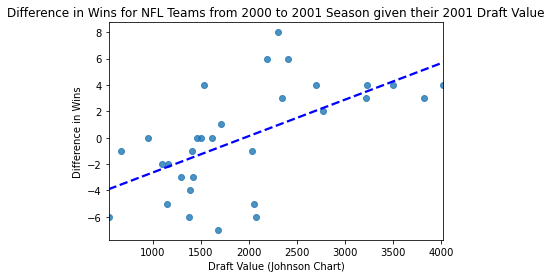

In [41]:
sns.regplot(x=merged01['johnson'], y=merged01['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Difference in Wins',
                 xlabel='Draft Value (Johnson Chart)',title="Difference in Wins for NFL Teams from 2000 to 2001 Season given their 2001 Draft Value")

[Text(0, 0.5, 'Wins Difference'),
 Text(0.5, 0, 'Draft Value'),
 Text(0.5, 1.0, '2016-17')]

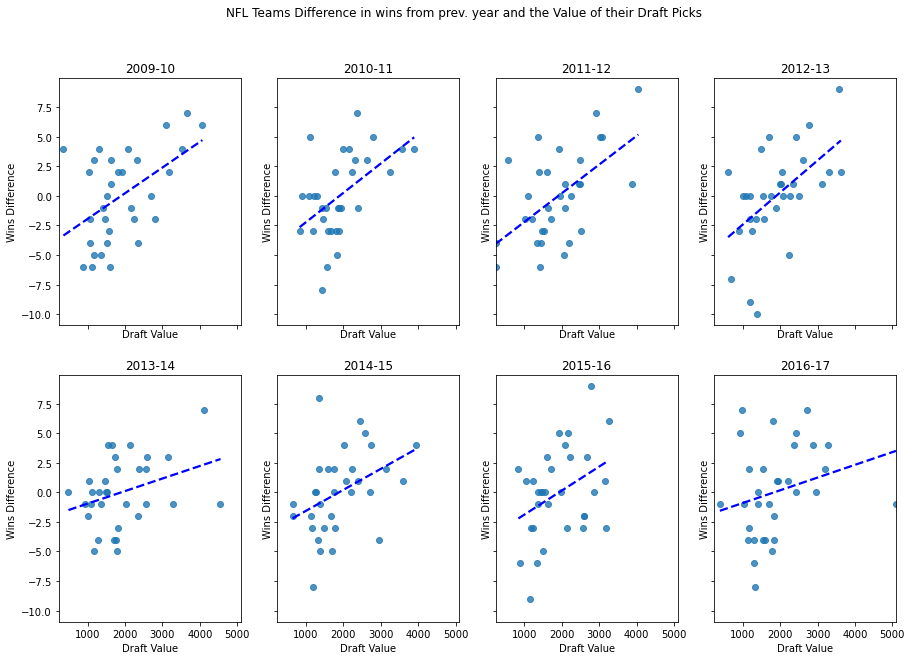

In [60]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10),sharey=True,sharex=True)
fig.suptitle('NFL Teams Difference in wins from prev. year and the Value of their Draft Picks')

wins10=team_wins[team_wins["Year"]==2010]
value10=datavalue.loc[2010]
teams10=value10.groupby("team")["johnson"].sum()
merged10=wins10.merge(teams10,how="outer",left_on="NFL Team",right_on="team").set_axis(wins10.index)
merged10=merged10.reset_index()

wins11=team_wins[team_wins["Year"]==2011]
value11=datavalue.loc[2011]
teams11=value11.groupby("team")["johnson"].sum()
merged11=wins11.merge(teams11,how="outer",left_on="NFL Team",right_on="team").set_axis(wins11.index)
merged11=merged11.reset_index()

wins12=team_wins[team_wins["Year"]==2012]
value12=datavalue.loc[2012]
teams12=value12.groupby("team")["johnson"].sum()
merged12=wins12.merge(teams12,how="outer",left_on="NFL Team",right_on="team").set_axis(wins12.index)
merged12=merged12.reset_index()

wins13=team_wins[team_wins["Year"]==2013]
value13=datavalue.loc[2013]
teams13=value13.groupby("team")["johnson"].sum()
merged13=wins13.merge(teams13,how="outer",left_on="NFL Team",right_on="team").set_axis(wins13.index)
merged13=merged13.reset_index()

wins14=team_wins[team_wins["Year"]==2014]
value14=datavalue.loc[2014]
teams14=value14.groupby("team")["johnson"].sum()
merged14=wins14.merge(teams14,how="outer",left_on="NFL Team",right_on="team").set_axis(wins14.index)
merged14=merged14.reset_index()

wins15=team_wins[team_wins["Year"]==2015]
value15=datavalue.loc[2015]
teams15=value15.groupby("team")["johnson"].sum()
merged15=wins15.merge(teams15,how="outer",left_on="NFL Team",right_on="team").set_axis(wins15.index)
merged15=merged15.reset_index()

wins16=team_wins[team_wins["Year"]==2016]
value16=datavalue.loc[2016]
teams16=value16.groupby("team")["johnson"].sum()
merged16=wins16.merge(teams16,how="outer",left_on="NFL Team",right_on="team").set_axis(wins16.index)
merged16=merged16.reset_index()

wins17=team_wins[team_wins["Year"]==2017]
value17=datavalue.loc[2017]
teams17=value17.groupby("team")["johnson"].sum()
merged17=wins17.merge(teams17,how="outer",left_on="NFL Team",right_on="team").set_axis(wins17.index)
merged17=merged17.reset_index()

sns.regplot(ax=axes[0,0],x=merged10['johnson'], y=merged10['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2009-10")
sns.regplot(ax=axes[0,1],x=merged11['johnson'], y=merged11['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2010-11")
sns.regplot(ax=axes[0,2],x=merged12['johnson'], y=merged12['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2011-12")
sns.regplot(ax=axes[0,3],x=merged13['johnson'], y=merged13['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2012-13")
sns.regplot(ax=axes[1,0],x=merged14['johnson'], y=merged14['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2013-14")
sns.regplot(ax=axes[1,1],x=merged15['johnson'], y=merged15['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2014-15")
sns.regplot(ax=axes[1,2],x=merged16['johnson'], y=merged16['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2015-16")
sns.regplot(ax=axes[1,3],x=merged17['johnson'], y=merged17['diff'], ci=False, line_kws={'color':'blue','label':'best fit',"linestyle":"dashed"}).set(ylabel='Wins Difference',
                 xlabel='Draft Value',title="2016-17")